In [11]:
import tensorflow as tf
from tensorflow.keras import models, layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt



In [12]:
BATCH_SIZE = 32
IMAGE_SIZE = 256
CHANNELS = 3
EPOCHS = 25



In [13]:
# Data Augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=0.2,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    validation_split=0.2
)



In [14]:
train_generator = train_datagen.flow_from_directory(
    "Tomato",
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training',
)



Found 12813 images belonging to 10 classes.


In [15]:


validation_generator = train_datagen.flow_from_directory(
    "Tomato",
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation',
)


Found 3198 images belonging to 10 classes.


In [16]:

class_names = train_generator.class_indices
print(class_names)

{'Tomato_Bacterial_spot': 0, 'Tomato_Early_blight': 1, 'Tomato_Late_blight': 2, 'Tomato_Leaf_Mold': 3, 'Tomato_Septoria_leaf_spot': 4, 'Tomato_Spider_mites_Two_spotted_spider_mite': 5, 'Tomato__Target_Spot': 6, 'Tomato__Tomato_YellowLeaf__Curl_Virus': 7, 'Tomato__Tomato_mosaic_virus': 8, 'Tomato_healthy': 9}


In [17]:

# Model Definition
model = models.Sequential([
    layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(IMAGE_SIZE, IMAGE_SIZE, CHANNELS)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(len(class_names), activation='softmax'),
])



In [18]:
# Model Compilation
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)



In [19]:
# Model Training
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // BATCH_SIZE,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // BATCH_SIZE,
    epochs=EPOCHS
)



Epoch 1/25
400/400 [==============================] - 328s 818ms/step - loss: 1.5768 - accuracy: 0.4414 - val_loss: 1.2193 - val_accuracy: 0.5941
Epoch 2/25
400/400 [==============================] - 332s 830ms/step - loss: 0.9363 - accuracy: 0.6747 - val_loss: 0.7459 - val_accuracy: 0.7456
Epoch 3/25
400/400 [==============================] - 328s 820ms/step - loss: 0.7011 - accuracy: 0.7587 - val_loss: 0.5530 - val_accuracy: 0.8021
Epoch 4/25
400/400 [==============================] - 332s 830ms/step - loss: 0.5446 - accuracy: 0.8069 - val_loss: 0.4704 - val_accuracy: 0.8292
Epoch 5/25
400/400 [==============================] - 332s 829ms/step - loss: 0.4800 - accuracy: 0.8305 - val_loss: 0.4630 - val_accuracy: 0.8387
Epoch 6/25
400/400 [==============================] - 330s 825ms/step - loss: 0.4235 - accuracy: 0.8523 - val_loss: 0.5338 - val_accuracy: 0.8147
Epoch 7/25
400/400 [==============================] - 330s 825ms/step - loss: 0.3706 - accuracy: 0.8702 - val_loss: 0.3322 -

In [20]:
# Model Evaluation
scores = model.evaluate(validation_generator)
print("Validation Loss:", scores[0])
print("Validation Accuracy:", scores[1])



100/100 [==============================] - 45s 452ms/step - loss: 0.1553 - accuracy: 0.9531
Validation Loss: 0.1552928239107132
Validation Accuracy: 0.9530956745147705


In [21]:
# Saving the Model
model.save("tomatoemodelnew.h5")


C:\Users\Kusal\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np
import os
import matplotlib.pyplot as plt
import random

BATCH_SIZE = 32
IMAGE_SIZE = 256

# Load the saved model
model = tf.keras.models.load_model("tomatoemodelnew.h5")

# Path to the directory containing test images
test_dir = "test_data"

# Get list of test images
test_images = [os.path.join(test_dir, img) for img in os.listdir(test_dir)]

# Mapping class indices to class labels
class_labels = {0: "Potato___Early_blight", 1: "Potato___Late_blight", 2: "Potato___healthy"}  # Update with your actual class labels

# Function to preprocess image
def preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(IMAGE_SIZE, IMAGE_SIZE))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0) / 255.0  # Rescale and expand dimensions
    return img, img_array

# Select 20 random images
random_test_images = random.sample(test_images, 20)

# Perform predictions and display images
for img_path in random_test_images:
    img, preprocessed_img = preprocess_image(img_path)
    prediction = model.predict(preprocessed_img)

    # Display image
    plt.imshow(img)
    plt.axis('off')

    # Display prediction
    actual_label = img_path.split(os.path.sep)[-1].split("_")[0]  # Extracting actual label from image file name
    predicted_label = class_labels[np.argmax(prediction)]  # Getting predicted label
    prediction_probabilities = prediction[0]
    print("Image:", img_path)
    print("Actual Label:", actual_label)
    print("Predicted Label:", predicted_label)
    print("Prediction Probabilities:", prediction_probabilities)
    plt.title(f"Actual: {actual_label}, Predicted: {predicted_label}\nProbabilities: {prediction_probabilities}")
    plt.show()




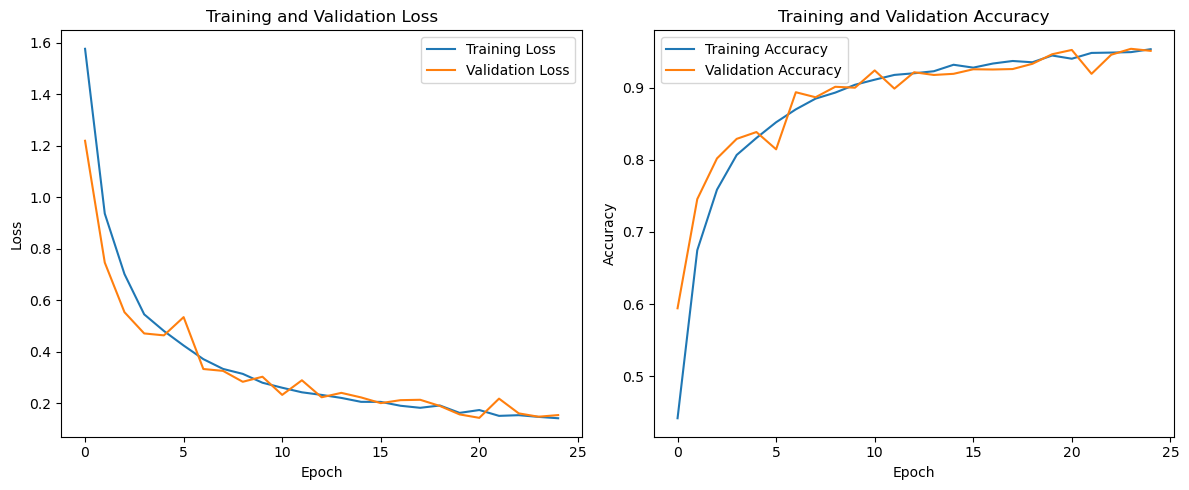

100/100 [==============================] - 45s 447ms/step


In [22]:
import numpy as np
from sklearn.metrics import roc_curve, auc

# Plot Loss and Accuracy
plt.figure(figsize=(12, 5))

# Plot Loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot Accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

# Compute predictions and true labels for the validation set
predictions = model.predict(validation_generator)
y_true = validation_generator.classes


